In [2]:
import numpy as np # linear algebra
np.random.seed(10)
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn import datasets
wine_data = datasets.load_wine()
X = wine_data["data"]
Y = wine_data["target"]


In [4]:
tiny_features = X[:, [0, 2]]
labels = Y
X_train_tiny, X_test_tiny, Y_train_tiny, Y_test_tiny = train_test_split(tiny_features, labels, test_size=0.30)

print('Training records:', Y_train_tiny.size)
print('Test records:', Y_test_tiny.size)

Training records: 124
Test records: 54


## simplistic perceptron - neuron
inputs and one neuron
1) matrix element-wise multiplication: input * weights
2) activation function

In [5]:
def sigmoid_act(x, der=False):
    import numpy as np

    if (der==True) : #derivative of the sigmoid
        f = x/(1-x)
    else : # sigmoid
        f = 1/(1+ np.exp(-x))

    return f

# We may employ the Rectifier Linear Unit (ReLU)
def ReLU_act(x, der=False):
    import numpy as np

    if (der== True):
        if x>0 :
            f= 1
        else :
            f = 0
    else :
        if x>0:
            f = x
        else :
            f = 0
    return f

# one perceptron, just to show weights multiplication
def perceptron(X, act='Sigmoid'):
    shapes = X.shape
    n= shapes[0]+shapes[1]
    w = 2*np.random.random(shapes) - 0.5 # We want w to be between -1 and 1
    b = np.random.random(1)

    f = b[0] #init with output bias

    # multiply X(input) * w(weights) and sum elements
    f += np.sum(np.multiply(X, w))/n
    # for i in range(0, X.shape[0]-1) : # run over column elements
    #     for j in range(0, X.shape[1]-1) : # run over rows elements
    #         f += w[i, j]*X[i,j]/n

    if act == 'Sigmoid':
        output = sigmoid_act(f)
    else :
        output = ReLU_act(f)

    return output

print('Output with sigmoid activator: ', perceptron(tiny_features))
print('Output with ReLU activator: ', perceptron(tiny_features))

Output with sigmoid activator:  0.9994012384396762
Output with ReLU activator:  0.999568753661553


In [13]:
def sigmoid_act(x, der=False):
    import numpy as np

    if (der==True) : #derivative of the sigmoid
        f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
    else : # sigmoid
        f = 1/(1+ np.exp(- x))

    return f

def ReLU_act(x, der=False):
    import numpy as np

    if (der == True): # the derivative of the ReLU is the Heaviside Theta
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)

    return f

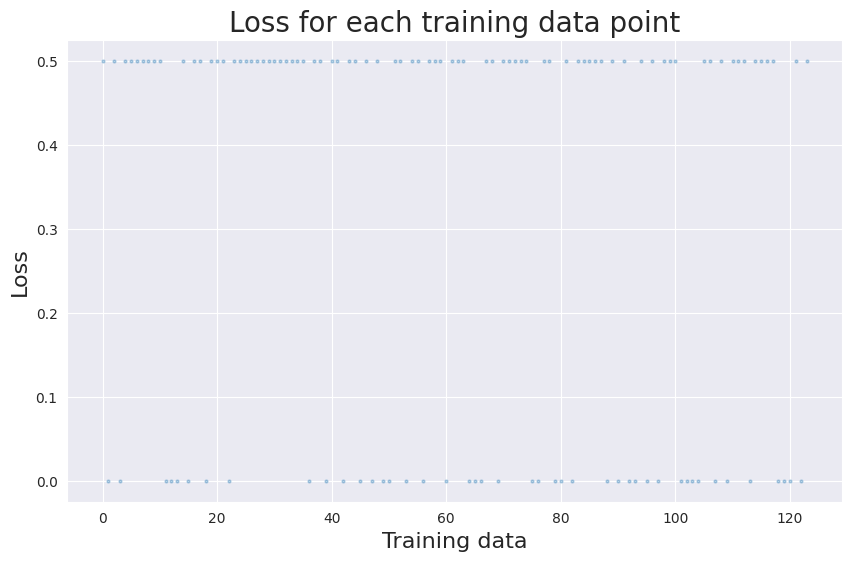

ValueError: x and y must be the same size

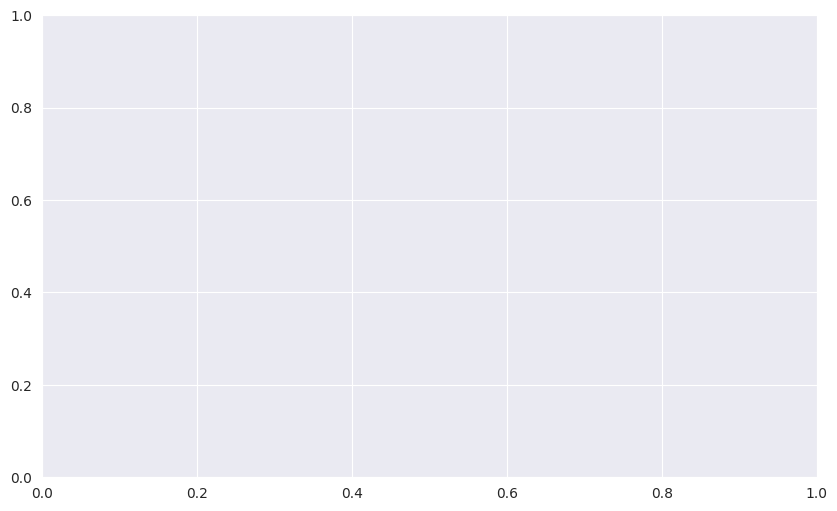

In [16]:
# Set up the number of perceptron per each layer:
p=4 # Layer 1
q=4 # Layer 2

# Set up the Learning rate
eta =  1/623


# 0: Random initialize the relevant data 
w1 = 2 * np.random.rand(p, X_train_tiny.shape[1]) - 0.5 # Layer 1
b1 = np.random.rand(p)

w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
b2 = np.random.rand(q)

wOut = 2*np.random.rand(q) - 0.5  # Output Layer
bOut = np.random.rand(1)

mu = []
vec_y = []

# Start looping over the passengers, i.e. over I.

for I in range(0, X_train_tiny.shape[0]): #loop in all the passengers:
    
    # 1: input the data 
    x = X_train_tiny[I]
    
    
    # 2: Start the algorithm
    
    # 2.1: Feed forward
    z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
    z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
    y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
    
    #2.2: Compute the output layer's error
    delta_Out = (y - Y_train_tiny[I]) * sigmoid_act(y, der=True)
    
    #2.3: Backpropagate
    delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
    delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
    
    # 3: Gradient descent 
    wOut = wOut - eta*delta_Out*z2  # Outer Layer
    bOut = bOut - eta*delta_Out
    
    w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
    b2 = b2 - eta*delta_2
    
    w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0]) # Hidden Layer 1
    b1 = b1 - eta*delta_1
    
    # 4. Computation of the loss function
    mu.append((1/2) * (y - Y_train_tiny[I]) ** 2)
    vec_y.append(y[0])


# Plotting the Cost function for each training data     
plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, X_train_tiny.shape[0]), mu, alpha=0.3, s=4, label='mu')
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

# Plotting the average cost function over 10 training data    
pino = []
for i in range(0, 2):
    pippo = 0
    for m in range(0, 10):
        pippo+=vec_y[60*i+m]/60
    pino.append(pippo)
    
    

plt.figure(figsize=(10,6))
plt.scatter(np.arange(0, 9), pino, alpha=1, s=10, label='error')
plt.title('Averege Loss by epoch', fontsize=20)
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

## Define the Training as a Function

Since we have learnt how to train an ANN, we are in the position of define a function that does that, by eating the X_train, Y_train as well as the number of perceptron $p,q$ for the first and second hidden layer, and the learning rate $\eta$.

In [8]:
def ANN_train(X_train, Y_train, p=4, q=4, eta=0.0015):
    import numpy as np
    import matplotlib.pyplot as plt
    
    # 0: Random initialize the relevant data 
    w1 = 2*np.random.rand(p , X_train.shape[1]) - 0.5 # Layer 1
    b1 = np.random.rand(p)

    w2 = 2*np.random.rand(q , p) - 0.5  # Layer 2
    b2 = np.random.rand(q)

    wOut = 2*np.random.rand(q) - 0.5   # Output Layer
    bOut = np.random.rand(1)

    mu = []
    vec_y = []

    # Start looping over the passengers, i.e. over I.

    for I in range(0, X_train.shape[0]-1): #loop in all the passengers:
    
        # 1: input the data 
        x = X_train[I]
    
        # 2: Start the algorithm
    
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut) # Output of the Output layer
    
        #2.2: Compute the output layer's error
        delta_Out = 2 * (y-Y_train[I]) * sigmoid_act(y, der=True)
    
        #2.3: Backpropagate
        delta_2 = delta_Out * wOut * ReLU_act(z2, der=True) # Second Layer Error
        delta_1 = np.dot(delta_2, w2) * ReLU_act(z1, der=True) # First Layer Error
    
        # 3: Gradient descent 
        wOut = wOut - eta*delta_Out*z2  # Outer Layer
        bOut = bOut - eta*delta_Out
    
        w2 = w2 - eta*np.kron(delta_2, z1).reshape(q,p) # Hidden Layer 2
        b2 = b2 -  eta*delta_2
    
        w1 = w1 - eta*np.kron(delta_1, x).reshape(p, x.shape[0])
        b1 = b1 - eta*delta_1
    
        # 4. Computation of the loss function
        mu.append((y-Y_train[I])**2)
        vec_y.append(y)
    
    batch_loss = []
    for i in range(0, 10):
        loss_avg = 0
        for m in range(0, 60):
            loss_avg+=vec_y[60*i+m]/60
        batch_loss.append(loss_avg)
    
    
    plt.figure(figsize=(10,6))
    plt.scatter(np.arange(1, len(batch_loss)+1), batch_loss, alpha=1, s=10, label='error')
    plt.title('Averege Loss by epoch', fontsize=20)
    plt.xlabel('Epoch', fontsize=16)
    plt.ylabel('Loss', fontsize=16)
    plt.show()
    
    return w1, b1, w2, b2, wOut, bOut, mu

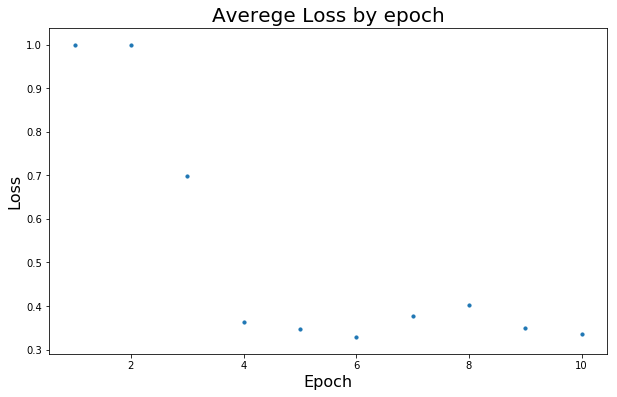

In [9]:
w1, b1, w2, b2, wOut, bOut, mu = ANN_train(X_train_tiny, Y_train_tiny, p=8, q=4, eta=0.0015)

# Compute Predictions

We now have to compute predictions from our trained ANN. In order to do so we need to recall the trained parameters $\{w\}, \{b\}$ and use them to actually get the predictions. 

In [10]:
def ANN_pred(X_test, w1, b1, w2, b2, wOut, bOut, mu):
    import numpy as np
    
    pred = []
    
    for I in range(0, X_test.shape[0]): #loop in all the passengers
        # 1: input the data 
        x = X_test[I]
        
        # 2.1: Feed forward
        z1 = ReLU_act(np.dot(w1, x) + b1) # output layer 1 
        z2 = ReLU_act(np.dot(w2, z1) + b2) # output layer 2
        y = sigmoid_act(np.dot(wOut, z2) + bOut)  # Output of the Output layer
        
        # Append the prediction;
        # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
        # if y < 0.5 the output is zero, otherwise is 1
        pred.append( np.heaviside(y - 0.5, 1)[0] )
    
    
    return np.array(pred);

In [11]:
predictions = ANN_pred(X_test_tiny, w1, b1, w2, b2, wOut, bOut, mu)

# Evaluation report

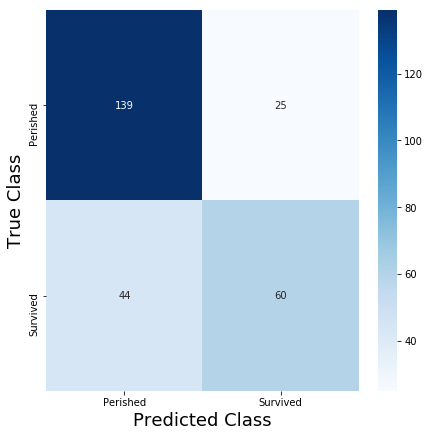

In [12]:
# Plot the confusion matrix
cm = confusion_matrix(Y_test_tiny, predictions)

df_cm = pd.DataFrame(cm, index = [dict_live[i] for i in range(0,2)], columns = [dict_live[i] for i in range(0,2)])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("True Class", fontsize=18)
plt.show()

Of course the outcome is **not** amazing, but we have to keep in mind that this is a very simple (almost naive) implementation of an artificial neural network whose main goal was to explain (mostly to myself) how an ANN works in practice and how it is possible to implement it into *Python* from scratch. 

# Exporting the predictions and submit them

We now need to load the 'test.csv' dataset and use the trained ANN to make predictions. 

In [13]:
test_data = pd.read_csv('../input/titanic/test.csv')

test_data.head(4)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S


We extract the relevant feature from the test_data as we have done before

In [14]:
# We apply the dictionary using a lambda function and the pandas .apply() module
test_data['Bsex'] = test_data['Sex'].apply(lambda x : dict_sex[x])


X = test_data[['Pclass', 'Bsex']].to_numpy()

test_predictions = ANN_pred(X, w1, b1, w2, b2, wOut, bOut, mu)

We thus export the predictions as a *Comma Separated Values* (csv) file. We then create a link that allows us to download such csv [1].

-----
[1] https://www.kaggle.com/getting-started/58426

In [15]:
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": test_predictions
    })

submission.head(5)

# Export it in a 'Comma Separated Values' (CSV) file
import os
os.chdir(r'../working')
submission.to_csv(r'submission.csv', index=False)
# Creating a link to download the .csv file we created
from IPython.display import FileLink
FileLink(r'submission.csv')

/kaggle/working/submission.csv

We have thus created a csv file containing our predictions for the Titanic 'test.csv' dataframe using our simple (2+1)-layer Artificial Neural Network!

# The ANN as a Class

We want now to implement the code as Class for Python, so that we could easiliy generalize it; the goal is to have a class from which we can instantiate an object "Neural Network", and add to it as many hidden layers with as many neurons we want, with the desired activation functions and so on. To generalize further, we define also the *Activation_function* class and the *layers* class, so we may easily add more activation funtions or more different layers (such as Convolutional or Pooling layers for Convolutional Neural Networks).

Within the ANN class, we define the following methods:
* **add**: it eats a tuple ( int(number_of_neurons), string(activation_function) ), i.e. the output of the ANN.layer method. It is a void method. It updates the HiddenLayer string defined by the __init__ method. 
* **FeedForward**: it implements the Feed Forward layer by layer.
* **BackPropagation**: it implements the whole gradient descent mechanism; first, it computes the errors by implementing the backpropagation; then, it updates the ANN parameters by gradient descent. 
* **Fit**: this method eats the training features and labels and fits the ANN by calling iteratively *FeedForward* and *BackPropagation* methods. This allow us to easily modify (or generalize) either *FeedForward* or *BackPropagation* methods without altering the *Fit* method.
* **predict**: it eats the featurs and spits the label predictions. 
* **set_learning_rate**: by default the learning rate is initialized to be 1, but we can call this method to set it to a different value. 
* **get_accuracy, get_avg_accuracy**: these methods' aim is to return the cost function either at each step of the training process or averaging over 10 passengers, respectively.

In the **layers** class we have
* **layer**: it eats two imputs, the number of neurons and the activation function (as a string); it returns a tuple of the two. The idea is to leave room for a generalization of the *layers.layer* method later on by adding multiple layer type (i.e. Pooling or Convolutional layers for the CNN).

In the **Activation_function** class we have
* **ReLU_act, sigmoid_act**: these are the activation functions. They can be easily generalized (LeakyReLU, ParametricReLU, etc.)

## An initialization Improvement

I recently found an interesting article on the web [1] (see [2] for an easy&fast review) where the authors were able to define a well-performing initialization method for the $\{w\}$ and $\{b\}$ of the ANN. It relies on the knowledge of the dimension of the previous layer; so they are gaussian-distributed randomly initialized values divided by the squareroot of the dimension of the previous layer, i.e.
> w = np.random.randn(layer_size[l],layer_size[l-1])*np.sqrt(2/layer_size[l-1])
>
> b = np.random.randn(layer_size[l])*np.sqrt(2/layer_size[l-1])

Using that, as well as *Parametric Rectified Linear Units* (P-ReLU), they were able to obtain a result that
> [...] *is the first to surpass human-level performance (5.1%, Russakovsky et al.) on this visual recognition challenge.*

The visual recognition challenge they are referring to is the **ImageNet Large Scale Visual Recognition Competition (ILSVRC) 2014**.

-----
[1] https://arxiv.org/abs/1502.01852

[2] https://towardsdatascience.com/random-initialization-for-neural-networks-a-thing-of-the-past-bfcdd806bf9e

In [17]:
'''
Artificial Neural Network Class
'''
class ANN:
    import numpy as np # linear algebra
    np.random.seed(10)
    
    '''
    Initialize the ANN;
    HiddenLayer vector : will contain the Layers' info
    w, b, phi = (empty) arrays that will contain all the w, b and activation functions for all the Layers
    mu = cost function
    eta = a standard learning rate initialization. It can be modified by the 'set_learning_rate' method
    '''
    def __init__(self) :
        self.HiddenLayer = []
        self.w = []
        self.b = []
        self.phi = []
        self.mu = []
        self.eta = 1 #set up the proper Learning Rate!!
    
    '''
    add method: to add layers to the network
    '''
    def add(self, lay = (4, 'ReLU') ):
        self.HiddenLayer.append(lay)
    
    '''
    FeedForward method: as explained before. 
    '''
    @staticmethod
    def FeedForward(w, b, phi, x):
        return phi(np.dot(w, x) + b)
        
    '''
    BackPropagation algorithm implementing the Gradient Descent 
    '''
    def BackPropagation(self, x, z, Y, w, b, phi):
        self.delta = []
        
        # We initialize ausiliar w and b that are used only inside the backpropagation algorithm once called        
        self.W = []
        self.B = []
        
        # We start computing the LAST error, the one for the OutPut Layer 
        self.delta.append(  (z[len(z)-1] - Y) * phi[len(z)-1](z[len(z)-1], der=True) )
        
        '''Now we BACKpropagate'''
        # We thus compute from next-to-last to first
        for i in range(0, len(z)-1):
            self.delta.append( np.dot( self.delta[i], w[len(z)- 1 - i] ) * phi[len(z)- 2 - i](z[len(z)- 2 - i], der=True) )
        
        # We have the error array ordered from last to first; we flip it to order it from first to last
        self.delta = np.flip(self.delta, 0)  
        
        # Now we define the delta as the error divided by the number of training samples
        self.delta = self.delta/self.X.shape[0] 
        
        '''GRADIENT DESCENT'''
        # We start from the first layer that is special, since it is connected to the Input Layer
        self.W.append( w[0] - self.eta * np.kron(self.delta[0], x).reshape( len(z[0]), x.shape[0] ) )
        self.B.append( b[0] - self.eta * self.delta[0] )
        
        # We now descend for all the other Hidden Layers + OutPut Layer
        for i in range(1, len(z)):
            self.W.append( w[i] - self.eta * np.kron(self.delta[i], z[i-1]).reshape(len(z[i]), len(z[i-1])) )
            self.B.append( b[i] - self.eta * self.delta[i] )
        
        # We return the descended parameters w, b
        return np.array(self.W), np.array(self.B)
    
    
    '''
    Fit method: it calls FeedForward and Backpropagation methods
    '''
    def Fit(self, X_train, Y_train):            
        print('Start fitting...')
        '''
        Input layer
        '''
        self.X = X_train
        self.Y = Y_train
        
        '''
        We now initialize the Network by retrieving the Hidden Layers and concatenating them 
        '''
        print('Model recap: \n')
        print('You are fitting an ANN with the following amount of layers: ', len(self.HiddenLayer))
        
        for i in range(0, len(self.HiddenLayer)) :
            print('Layer ', i+1)
            print('Number of neurons: ', self.HiddenLayer[i][0])
            if i==0:
                # We now try to use the He et al. Initialization from ArXiv:1502.01852
                self.w.append( np.random.randn(self.HiddenLayer[i][0] , self.X.shape[1])/np.sqrt(2/self.X.shape[1]) )
                self.b.append( np.random.randn(self.HiddenLayer[i][0])/np.sqrt(2/self.X.shape[1]))
                # Old initialization
                #self.w.append(2 * np.random.rand(self.HiddenLayer[i][0] , self.X.shape[1]) - 0.5)
                #self.b.append(np.random.rand(self.HiddenLayer[i][0]))
                
                # Initialize the Activation function
                for act in Activation_function.list_act():
                    if self.HiddenLayer[i][1] == act :
                        self.phi.append(Activation_function.get_act(act))
                        print('\tActivation: ', act)

            else :
                # We now try to use the He et al. Initialization from ArXiv:1502.01852
                self.w.append( np.random.randn(self.HiddenLayer[i][0] , self.HiddenLayer[i-1][0] )/np.sqrt(2/self.HiddenLayer[i-1][0]))
                self.b.append( np.random.randn(self.HiddenLayer[i][0])/np.sqrt(2/self.HiddenLayer[i-1][0]))
                # Old initialization
                #self.w.append(2*np.random.rand(self.HiddenLayer[i][0] , self.HiddenLayer[i-1][0] ) - 0.5)
                #self.b.append(np.random.rand(self.HiddenLayer[i][0]))
                
                # Initialize the Activation function
                for act in Activation_function.list_act():
                    if self.HiddenLayer[i][1] == act :
                        self.phi.append(Activation_function.get_act(act))
                        print('\tActivation: ', act)
            
        '''
        Now we start the Loop over the training dataset
        '''  
        for I in range(0, self.X.shape[0]): # loop over the training set
            '''
            Now we start the feed forward
            '''  
            self.z = []
            
            self.z.append( self.FeedForward(self.w[0], self.b[0], self.phi[0], self.X[I]) ) # First layers
            
            for i in range(1, len(self.HiddenLayer)): #Looping over layers
                self.z.append( self.FeedForward(self.w[i] , self.b[i], self.phi[i], self.z[i-1] ) )
        
            
            '''
            Here we backpropagate
            '''      
            self.w, self.b  = self.BackPropagation(self.X[I], self.z, self.Y[I], self.w, self.b, self.phi)
            
            '''
            Compute cost function
            ''' 
            self.mu.append(
                (1/2) * np.dot(self.z[len(self.z)-1] - self.Y[I], self.z[len(self.z)-1] - self.Y[I]) 
            )
            
        print('Fit done. \n')
        

    
    '''
    predict method
    '''
    def predict(self, X_test):
        
        print('Starting predictions...')
        
        self.pred = []
        self.XX = X_test
        
        for I in range(0, self.XX.shape[0]): # loop over the training set
            
            '''
            Now we start the feed forward
            '''  
            self.z = []
            
            self.z.append(self.FeedForward(self.w[0] , self.b[0], self.phi[0], self.XX[I])) #First layer
    
            for i in range(1, len(self.HiddenLayer)) : # loop over the layers
                self.z.append( self.FeedForward(self.w[i] , self.b[i], self.phi[i], self.z[i-1]))
       
            # Append the prediction;
            # We now need a binary classifier; we this apply an Heaviside Theta and we set to 0.5 the threshold
            # if y < 0.5 the output is zero, otherwise is zero
            self.pred.append( np.heaviside(  self.z[-1] - 0.5, 1)[0] ) # NB: self.z[-1]  is the last element of the self.z list
        
        print('Predictions done. \n')

        return np.array(self.pred)
   
    '''
    We need a method to retrieve the accuracy for each training data to follow the learning of the ANN
    '''
    def get_accuracy(self):
        return np.array(self.mu)
    # This is the averaged version
    def get_avg_accuracy(self):
        import math
        self.batch_loss = []
        for i in range(0, 10):
            self.loss_avg = 0
            # To set the batch in 10 element/batch we use math.ceil method
            # int(math.ceil((self.X.shape[0]-10) / 10.0))    - 1
            for m in range(0, (int(math.ceil((self.X.shape[0]-10) / 10.0))   )-1):
                #self.loss_avg += self.mu[60*i+m]/60
                self.loss_avg += self.mu[(int(math.ceil((self.X.shape[0]-10) / 10.0)) )*i + m]/(int(math.ceil((self.X.shape[0]-10) / 10.0)) )
            self.batch_loss.append(self.loss_avg)
        return np.array(self.batch_loss)
    
    '''
    Method to set the learning rate
    '''
    def set_learning_rate(self, et=1):
        self.eta = et
        
        
'''
layers class
'''
class layers :
    '''
    Layer method: used to call standar layers to add. 
    Easily generalizable to more general layers (Pooling and Convolutional layers)
    '''        
    def layer(p=4, activation = 'ReLU'):
        return (p, activation)

'''
Activation functions class
'''
class Activation_function(ANN):
    import numpy as np
    
    def __init__(self) :
        super().__init__()
        
    '''
    Define the sigmoid activator; we ask if we want the sigmoid or its derivative
    '''
    def sigmoid_act(x, der=False):
        if (der==True) : #derivative of the sigmoid
            f = 1/(1+ np.exp(- x))*(1-1/(1+ np.exp(- x)))
        else : # sigmoid
            f = 1/(1+ np.exp(- x))
        return f

    '''
    Define the Rectifier Linear Unit (ReLU)
    '''
    def ReLU_act(x, der=False):
        if (der == True): # the derivative of the ReLU is the Heaviside Theta
            f = np.heaviside(x, 1)
        else :
            f = np.maximum(x, 0)
        return f
    
    def list_act():
        return ['sigmoid', 'ReLU']
    
    def get_act(string = 'ReLU'):
        if string == 'ReLU':
            return ReLU_act
        elif string == 'sigmoid':
            return sigmoid_act
        else :
            return sigmoid_act

### Instantiating the class and Fitting the model

Now we instantiate our model, that will be exactly the same as before, i.e. a two-hidden layer with 8 and 4 neurons respectively and with ReLU activation plus an OutPut layer with a single neuron with sigmoid activation. 

We will set the learning rate and then fit the model; after that we recover the accuracy history (even in the averaged over 10 batches) and finally we compute the predictions.

In [18]:
model = ANN()

model.add(layers.layer(8, 'ReLU'))
model.add(layers.layer(4, 'ReLU'))
model.add(layers.layer(2, 'sigmoid'))

model.set_learning_rate(0.8)

model.Fit(X_train_tiny, Y_train_tiny)
acc_val = model.get_accuracy()
acc_avg_val = model.get_avg_accuracy()

predictions = model.predict(X_test_tiny)

Start fitting...
Model recap: 

You are fitting an ANN with the following amount of layers:  3
Layer  1
Number of neurons:  8
	Activation:  ReLU
Layer  2
Number of neurons:  4
	Activation:  ReLU
Layer  3
Number of neurons:  2
	Activation:  sigmoid
Fit done. 

Starting predictions...
Predictions done. 



/home/wojtek/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:334: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  m = asarray(m)
/tmp/ipykernel_13822/4097616222.py:71: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(self.W), np.array(self.B)


We plot the accuracy stories we have retrieved:

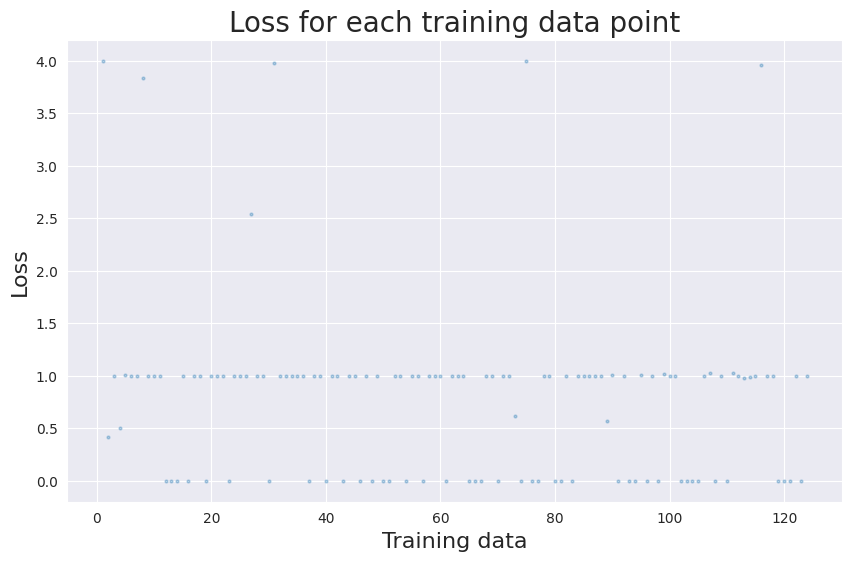

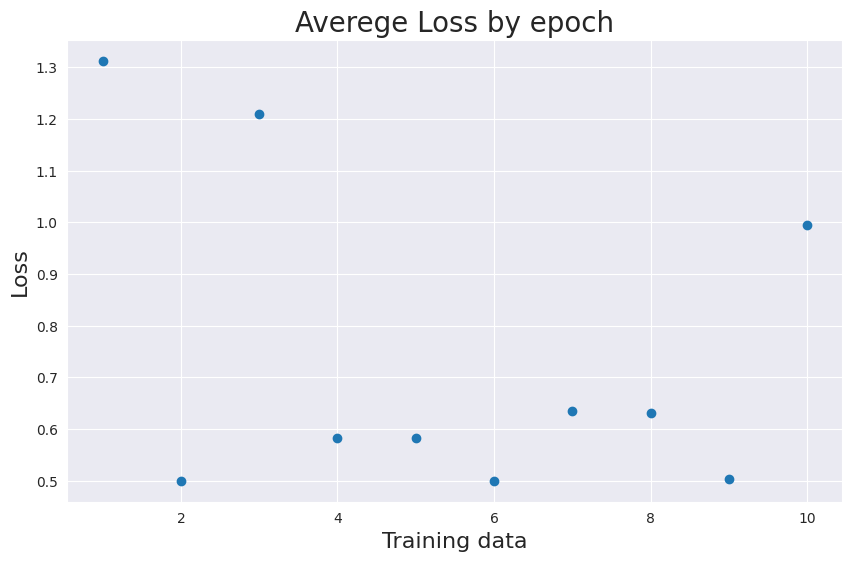

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(np.arange(1, X_train_tiny.shape[0] + 1), acc_val, alpha=0.3, s=4, label='mu')
plt.title('Loss for each training data point', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(np.arange(1, len(acc_avg_val)+1), acc_avg_val, label='mu')
plt.title('Averege Loss by epoch', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

And finally see how the system behaves as a classifier:

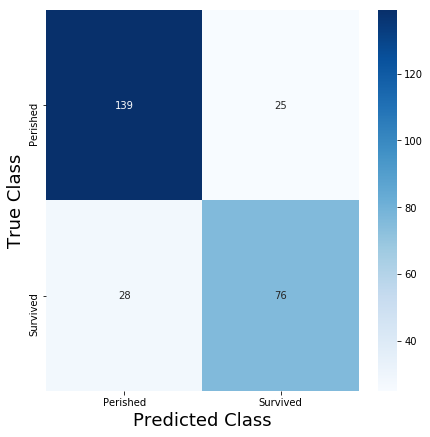

In [19]:
# Plot the confusion matrix
cm = confusion_matrix(Y_test_tiny, predictions)

df_cm = pd.DataFrame(cm, index = [dict_live[i] for i in range(0,2)], columns = [dict_live[i] for i in range(0,2)])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("True Class", fontsize=18)
plt.show()

## Conclusions
Notice that, having changed the random initialization following the He et al. procedure, we have improved the classification slightly (recall that this still is a very naive model). Now we can easily add more layers and, in the spirit of Convolutional Neural Network, we can easily modify the class to add for more generic layers like *Convolutional* or *Pooling* layers.

We can now try a more *deep* neural network for the case at hand:

Start fitting...
Model recap: 

You are fitting an ANN with the following amount of layers:  4
Layer  1
Number of neurons:  24
	Activation:  ReLU
Layer  2
Number of neurons:  12
	Activation:  sigmoid
Layer  3
Number of neurons:  6
	Activation:  ReLU
Layer  4
Number of neurons:  1
	Activation:  sigmoid
Fit done. 



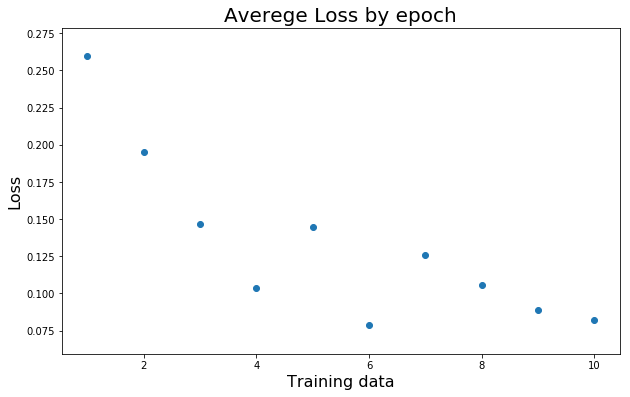

Starting predictions...
Predictions done. 



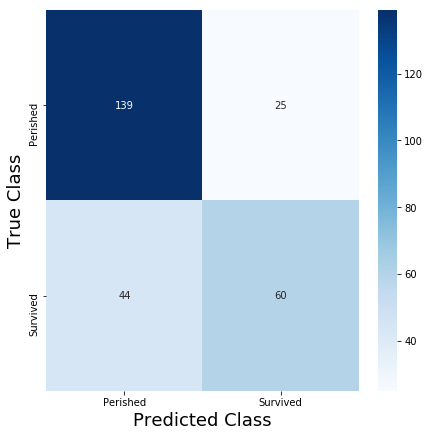

In [20]:
model = ANN()

model.add(layers.layer(24, 'ReLU'))
model.add(layers.layer(12, 'sigmoid'))
model.add(layers.layer(6, 'ReLU'))
model.add(layers.layer(1, 'sigmoid'))

model.set_learning_rate(0.8)

model.Fit(X_train_tiny, Y_train_tiny)
acc_val = model.get_accuracy()
acc_avg_val = model.get_avg_accuracy()

plt.figure(figsize=(10,6))
plt.scatter(np.arange(1, len(acc_avg_val)+1), acc_avg_val, label='mu')
plt.title('Averege Loss by epoch', fontsize=20)
plt.xlabel('Training data', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.show()

predictions = model.predict(X_test_tiny)

# Plot the confusion matrix
cm = confusion_matrix(Y_test_tiny, predictions)

df_cm = pd.DataFrame(cm, index = [dict_live[i] for i in range(0,2)], columns = [dict_live[i] for i in range(0,2)])
plt.figure(figsize = (7,7))
sns.heatmap(df_cm, annot=True, cmap=plt.cm.Blues, fmt='g')
plt.xlabel("Predicted Class", fontsize=18)
plt.ylabel("True Class", fontsize=18)
plt.show()

I hope you enjoyed it!

I would love to receive your comments (good AND bad), so feel free to leave a comment! 